In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("water_potability.csv")

In [3]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [4]:
df.shape

(3276, 10)

In [5]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [6]:
df_cts=df.iloc[:,:9]

In [7]:
df_cts

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658


<Axes: >

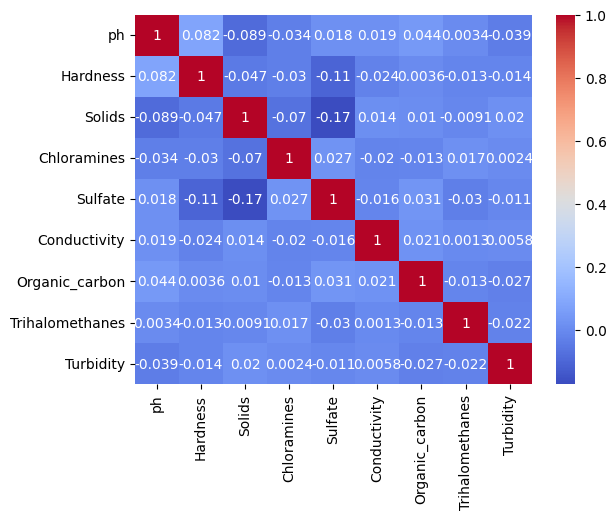

In [8]:
sns.heatmap(df_cts.corr(),cmap="coolwarm",annot=True)

count    2785.000000
mean        7.080795
std         1.594320
min         0.000000
25%         6.093092
50%         7.036752
75%         8.062066
max        14.000000
Name: ph, dtype: float64

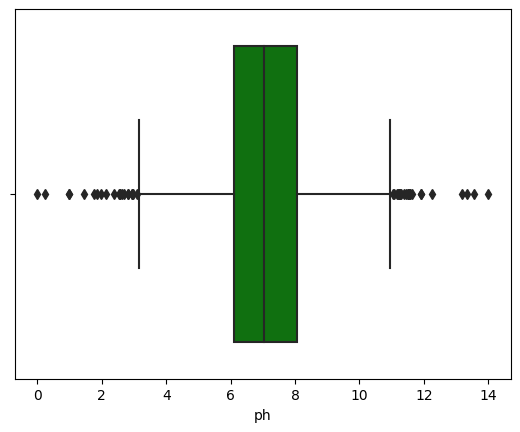

In [9]:
sns.boxplot(x=df["ph"],color ="green")
df["ph"].describe()

In [10]:
df["ph"]=df["ph"].fillna(df["ph"].mean())

In [11]:
df["ph"].isnull().sum()

0

count    2495.000000
mean      333.775777
std        41.416840
min       129.000000
25%       307.699498
50%       333.073546
75%       359.950170
max       481.030642
Name: Sulfate, dtype: float64

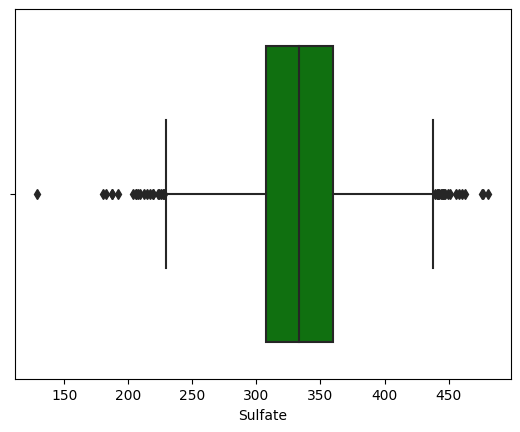

In [12]:
sns.boxplot(x=df["Sulfate"],color="green")
df["Sulfate"].describe()


In [13]:
df["Sulfate"].fillna(df["Sulfate"].mean(),inplace=True)

In [14]:
df["Sulfate"].isnull().sum()

0

count    3114.000000
mean       66.396293
std        16.175008
min         0.738000
25%        55.844536
50%        66.622485
75%        77.337473
max       124.000000
Name: Trihalomethanes, dtype: float64

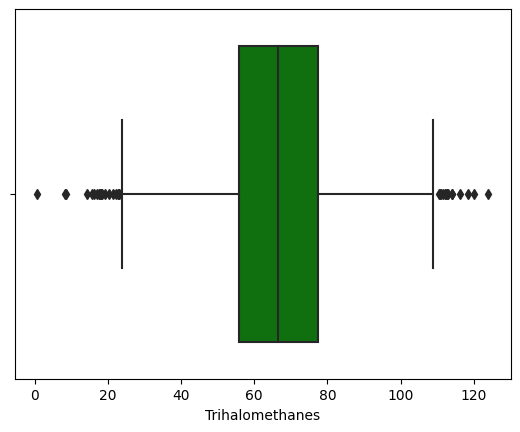

In [15]:
sns.boxplot(x=df["Trihalomethanes"],color="green")
df["Trihalomethanes"].describe()

In [16]:
df["Trihalomethanes"].fillna(df["Trihalomethanes"].mean(),inplace=True)

In [17]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [18]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [19]:
x = df.iloc[:,:9]

In [20]:
y = df.iloc[:,-1]

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state =0)

In [22]:
#feature scaling 

from sklearn.preprocessing import StandardScaler
st_x = StandardScaler()
x_train = st_x.fit_transform(x_train)
x_test = st_x.fit_transform(x_test)



In [23]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10,criterion="entropy")
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [24]:
y_pred = classifier.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))

Accuracy 0.6600609756097561


In [25]:
from sklearn.ensemble import GradientBoostingClassifier
gboost = GradientBoostingClassifier(n_estimators=10,criterion='squared_error')

In [26]:
gboost.fit(x_train,y_train)

GradientBoostingClassifier(criterion='squared_error', n_estimators=10)

In [34]:
y_pred_=gboost.predict(x_test)

In [35]:
print("Accuracy",accuracy_score(y_pred_,y_test))

Accuracy 0.6554878048780488


In [29]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [30]:
from xgboost import XGBClassifier
xgboost=XGBClassifier(n_estimators=10,objectives="binary:logistic")

In [32]:
xgboost.fit(x_train,y_train)

[17:50:27] WARNING: ../src/learner.cc:767: 
Parameters: { "objectives" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, num_parallel_tree=None,
              objectives='binary:logistic', predictor=None, ...)

In [36]:
y_pred__=xgboost.predict(x_test)

In [37]:
print("Accuracy",accuracy_score(y_pred__,y))

Accuracy 0.6585365853658537
